# Image classification on Fashion Data
- Import neccessary packages and ..
- Load the Fashion data using the keras API

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

In [2]:
fashion = keras.datasets.fashion_mnist
(xTrain, yTrain), (xTest, yTest) = fashion.load_data()

print('************************************************')
print(f'xTrain Shape = {xTrain.shape} \nxTrain Data Type = {xTrain.dtype}')
print(f'yTrain Shape = {yTrain.shape} \nyTrain Data Type = {yTrain.dtype}')
print('************************************************')
print(f'xTest Shape = {xTest.shape} \nxTestData Type = {xTest.dtype}')
print(f'yTest Shape = {yTest.shape} \nyTest Data Type = {yTest.dtype}')

************************************************
xTrain Shape = (60000, 28, 28) 
xTrain Data Type = uint8
yTrain Shape = (60000,) 
yTrain Data Type = uint8
************************************************
xTest Shape = (10000, 28, 28) 
xTestData Type = uint8
yTest Shape = (10000,) 
yTest Data Type = uint8


In [3]:
# Use 5000 instances from the train set as validation set
# Scale the data

xValid, xTrain2 = xTrain[:5000]/255., xTrain[5000:]/255.
yValid, yTrain2 = yTrain[:5000], yTrain[5000:]
xTest = xTest / 255.

# Define the Labels:

classNames = ["T-Shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

## Model Creation
- We use the Sequential API

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28],
                               name  = 'Inputs'))
model.add(keras.layers.Dense(300, activation='relu',
                             name='Hidden1'))
model.add(keras.layers.Dense(100, activation='relu',
                             name='Hidden2'))
model.add(keras.layers.Dense(10, activation='softmax',
                             name='Output'))

model.summary()

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Inputs (Flatten)                │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden1 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden2 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

- There is an equivalent way odf creating the model
- one can pass layers as parameters instead of creating layers and adding to the model as follows:

In [5]:
model2 = keras.models.Sequential(
    [keras.layers.Flatten(input_shape=[28, 28],
                               name  = 'InputsX'),
    keras.layers.Dense(300, activation='relu',
                             name='Hidden1X'),
    keras.layers.Dense(100, activation='relu',
                             name='Hidden2X'),
    keras.layers.Dense(10, activation='softmax',
                             name='OutputX')]
)

model2.summary()

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ InputsX (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden1X (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden2X (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputX (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

- The *model.summary* displays as much information of the neural network as possibl.
- However, if you want to find the layer names proceed as follows:

In [6]:
model.layers

[<Flatten name=Inputs, built=True>,
 <Dense name=Hidden1, built=True>,
 <Dense name=Hidden2, built=True>,
 <Dense name=Output, built=True>]

- Moreover, we can access the weights anf biases as follows:

In [9]:
hidden1 = model.layers[1]
w, b = hidden1.get_weights()
print(f'Weights shape: {w.shape}')
print(f'Biases shape: {b.shape}')
print(w)


Weights shape: (784, 300)
Biases shape: (300,)
[[ 0.00768319 -0.00237495 -0.01477955 ... -0.07261316  0.00534314
   0.02202963]
 [-0.0094942  -0.00956313  0.00684633 ... -0.05398936 -0.00377809
  -0.00786358]
 [ 0.0201083   0.04880139 -0.04517579 ...  0.07274172  0.0625111
  -0.06396817]
 ...
 [-0.01101404  0.05916315  0.00059578 ... -0.04675347  0.00615516
   0.03519838]
 [ 0.07359619 -0.03980327  0.0428435  ...  0.01093558 -0.0052093
  -0.0557863 ]
 [ 0.04044289  0.01898398 -0.0373849  ...  0.03761882 -0.05573104
  -0.04267995]]


### Model Compilation
 - We compile the model and specify
    - the loss function
    - the optimizer

In [9]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### Fitting or Training the Model:


In [10]:
# Train the model:
history = model.fit(xTrain2,yTrain2, epochs=30,
                    validation_data = (xValid, yValid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6943 - loss: 0.9739 - val_accuracy: 0.8148 - val_loss: 0.5245
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8268 - loss: 0.5064 - val_accuracy: 0.8410 - val_loss: 0.4634
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8419 - loss: 0.4474 - val_accuracy: 0.8578 - val_loss: 0.4186
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8501 - loss: 0.4226 - val_accuracy: 0.8602 - val_loss: 0.4051
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8619 - loss: 0.3965 - val_accuracy: 0.8392 - val_loss: 0.4528
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8637 - loss: 0.3857 - val_accuracy: 0.8694 - val_loss: 0.3791
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8682 - loss: 0.3727 - val_accuracy: 0.8732 - val_loss: 0.3642
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8728 - loss: 0.3604 - 

## Plot Los/Accuracy

- To determine our odel performance and if there is over fitting we will plot the metrics of the training

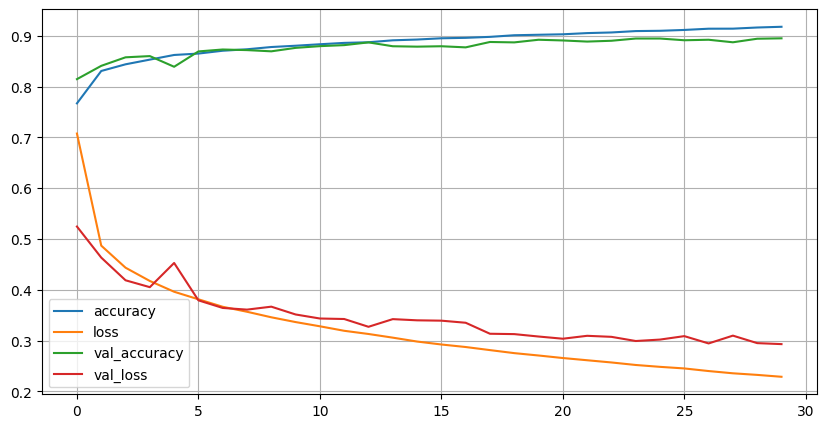

In [12]:
pd.DataFrame(history.history).plot(figsize = (10,5))
plt.grid()
plt.show()

## Evaluation and Prediction

- We can use our model to make predictions
- Before doing that, we can evaluate the model on the test set as follows:

In [13]:
model.evaluate(xTest, yTest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.8841 - loss: 0.3259


[0.32460957765579224, 0.8830999732017517]

- Now we can use the *predict* method to make predictions

In [23]:
probabilities = model.predict(xTest[:3])
probabilities.round(2)
for i, result in enumerate(probabilities):
    print('Model prediction = ' + classNames[np.argmax(result)])
    print(f'Actual fashion item = ' + classNames[yTest[i]])
    print('****************************************')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Model prediction = Ankle Boot
Actual fashion item = Ankle Boot
****************************************
Model prediction = Pullover
Actual fashion item = Pullover
****************************************
Model prediction = Trouser
Actual fashion item = Trouser
****************************************


### Saving the Model

- We are happy with our model and we would like to save it for future use.
- In future, we may want to train the model again or use it to make predictions

In [26]:
model.save('SavedModels/01FashionKerasModel.keras')